load the dataset and set the date as index

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Macau_weather_dataset.csv', parse_dates=['Date'], index_col='Date')
Mean_maximum = data.iloc[:,0]
Mean_mean = data.iloc[:,1]
Mean_minimum = data.iloc[:,2]
Humidity = data.iloc[:,3]
Isolation = data.iloc[:,4]
Rain = data.iloc[:,5]
#print(Mean_maximum)
print(data.head)

<bound method NDFrame.head of             Mean maximum (ºC)  Mean(ºC)  Mean minimum(ºC)  \
Date                                                        
1999-01-01               21.8      18.5              16.2   
1999-01-02               18.3      16.0              12.9   
1999-01-03               18.7      15.7              12.1   
1999-01-04               20.3      16.8              13.1   
1999-01-05               21.4      16.5              13.5   
...                       ...       ...               ...   
2019-08-16               32.8      29.2              27.1   
2019-08-17               31.3      27.6              25.4   
2019-08-18               31.4      26.7              23.9   
2019-08-19               32.4      28.4              25.7   
2019-08-20               30.6      28.3              26.8   

            Mean relative humidity (%)  Insolation duration (hour)  \
Date                                                                 
1999-01-01                          

In [3]:
import matplotlib.pyplot as plt  
import seaborn as sns  

try to plot the max_temp,but the pic isn't beautiful

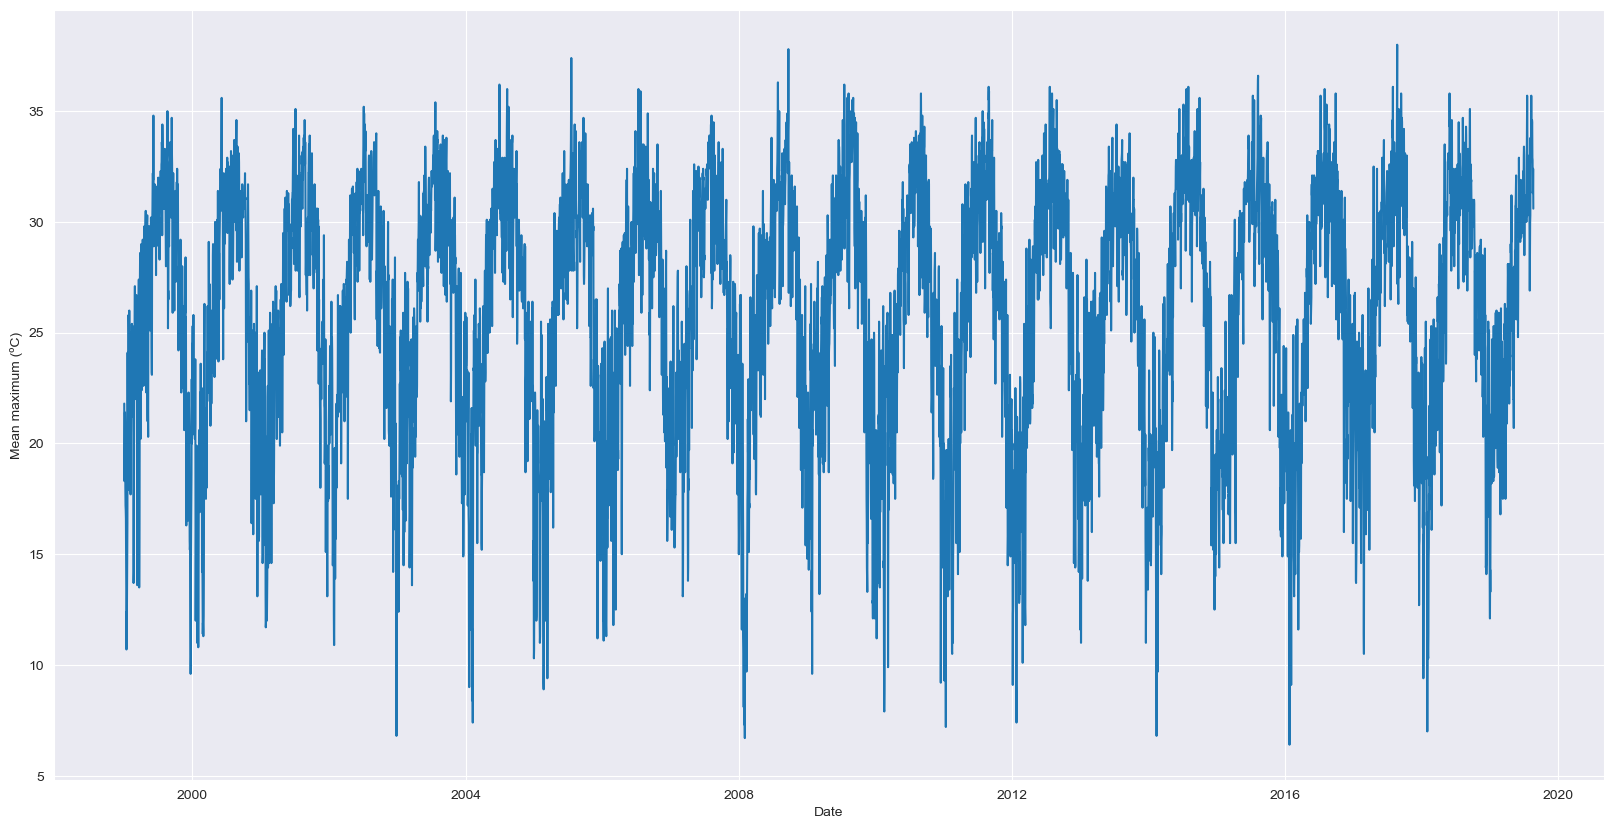

In [5]:
#try to plot the max_temp,but the pic isn't beautiful
plt.figure(figsize=(20,10))
sns.lineplot(data=data,x=data.index,y=Mean_maximum)
plt.show()


try to sample the data with month

C:\Users\业\AppData\Local\Temp\ipykernel_40296\44025357.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ave_maximum = Mean_maximum.resample('M').mean()


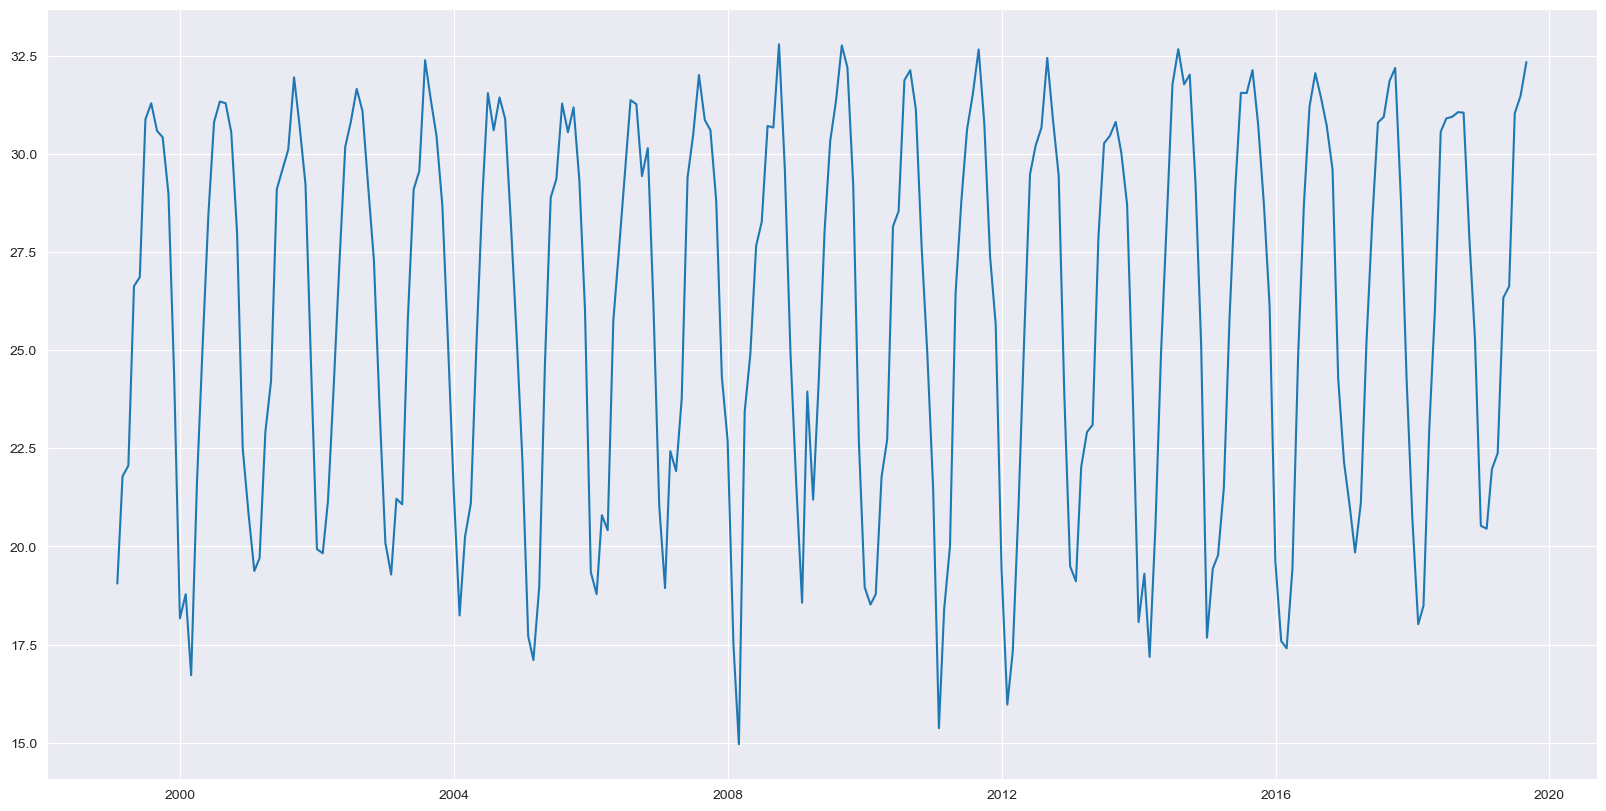

In [6]:
plt.figure(figsize=(20,10))
ave_maximum = Mean_maximum.resample('M').mean()
plt.plot(ave_maximum.index,ave_maximum)

combine the average_tem and min_tem

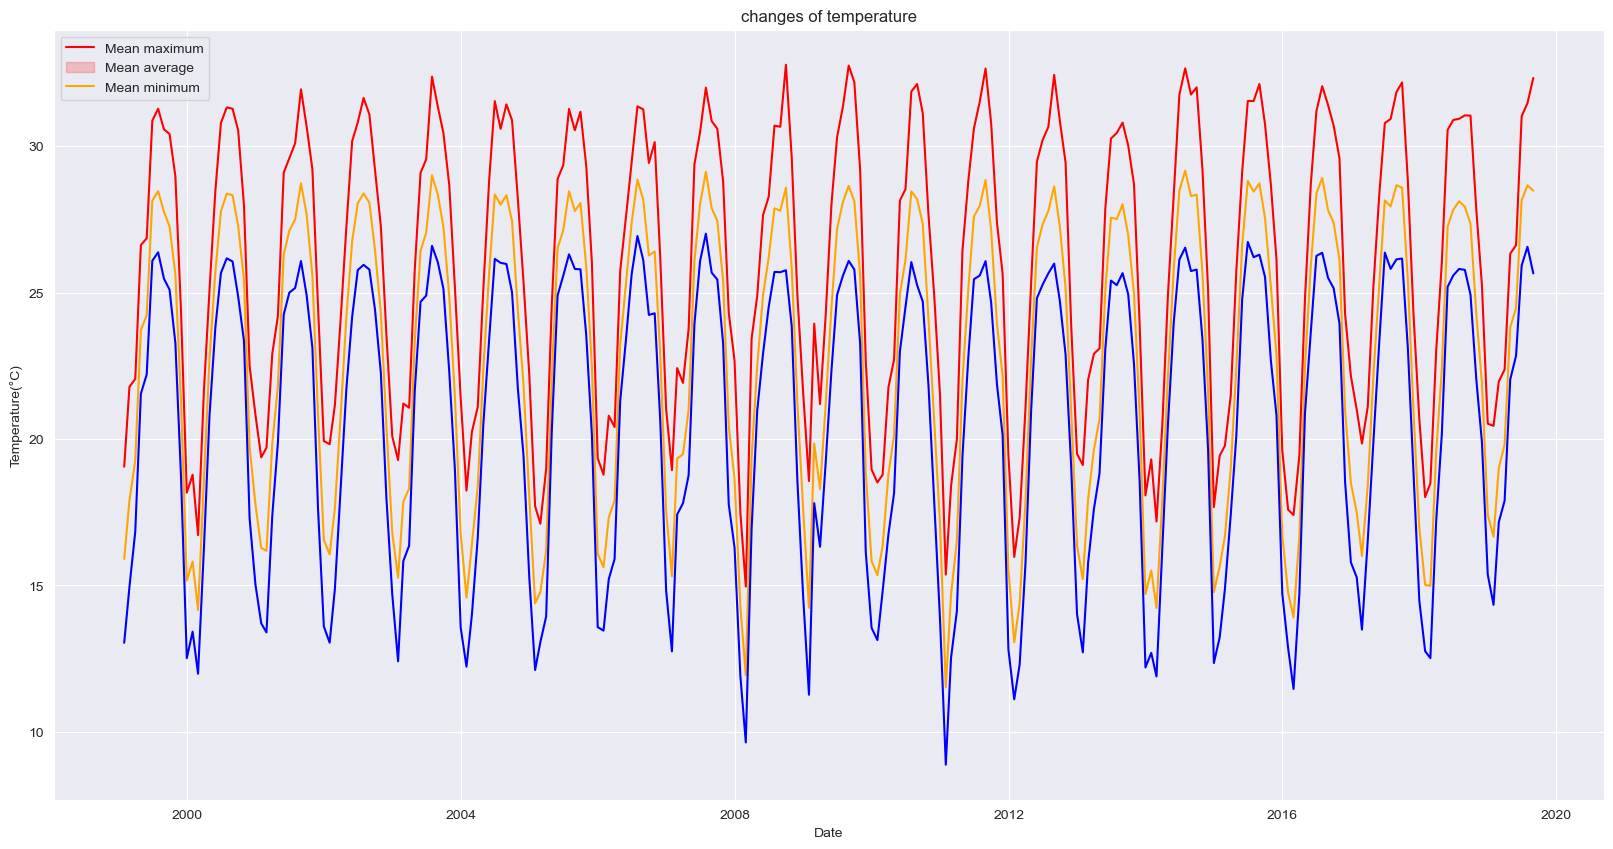

In [7]:
plt.figure(figsize=(20, 10))  
ave_maximum = Mean_maximum.resample('ME').mean()
ave_average = Mean_mean.resample('ME').mean()
ave_Minimum = Mean_minimum.resample('ME').mean()
sns.lineplot(x=ave_maximum.index,y=ave_maximum,color='red')
sns.lineplot(x=ave_average.index,y=ave_average,color='orange')
sns.lineplot(x=ave_Minimum.index,y=ave_Minimum,color='blue')
plt.title('changes of temperature')  
plt.xlabel('Date')  
plt.ylabel('Temperature(°C)')  
plt.legend(labels=['Mean maximum','Mean average','Mean minimum'])  
plt.show()

the pic does not show detailed data ,so try to transform the pic to the act-pic with python tool plotly

In [8]:
import plotly.graph_objects as go  
from plotly.subplots import make_subplots  

In [9]:
import plotly.io as pio
import plotly.express as px

pio.templates.default = "plotly_white"

In [10]:
import plotly
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, vertical_spacing=0.1)  
fig.add_trace(go.Scatter(x=ave_maximum.index,y=ave_maximum,  
                         mode='lines',  
                         name='Mean Maximum',  
                         line=dict(color='red', width=2)),  
              row=1, col=1)  
fig.add_trace(go.Scatter(x=ave_average.index,y=ave_average,  
                         mode='lines',  
                         name='Mean Average',  
                         line=dict(color='orange', width=2)),  
              row=1, col=1)  
fig.add_trace(go.Scatter(x=ave_Minimum.index,y=ave_Minimum,  
                         mode='lines',  
                         name='Mean Minimum',  
                         line=dict(color='blue', width=2)),  
              row=1, col=1)  
  
fig.update_layout(  
    xaxis=dict(  
        rangeslider=dict(  
            visible=True  
        ),  
        type='date'  
    )  
)  
   
fig.update_layout(title='Changes of Temperature',  
                  xaxis_title='Date',  
                  yaxis_title='Temperature (°C)')  
plotly.offline.plot(fig, filename='figure1.html', auto_open=False)

fig.show()

Then add data of rain into the pic

In [11]:
Rain=Rain.replace('VST', 0.01).astype(float)
#print(Rain.head)
month_rain=Rain.resample('ME').sum()


In [12]:
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(go.Scatter(x=ave_maximum.index,y=ave_maximum,  
                         mode='lines',  
                         name='Mean Maximum',  
                         line=dict(color='red', width=2),),  
              row=1, col=1,secondary_y=False,)  
fig.add_trace(go.Scatter(x=ave_average.index,y=ave_average,  
                         mode='lines',  
                         name='Mean Average',  
                         line=dict(color='orange', width=2)),  
              row=1, col=1,secondary_y=False,)  
fig.add_trace(go.Scatter(x=ave_Minimum.index,y=ave_Minimum,  
                         mode='lines',  
                         name='Mean Minimum',  
                         line=dict(color='blue', width=2)),  
              row=1, col=1,secondary_y=False,)  
fig.add_trace(go.Scatter(x=month_rain.index, y=month_rain,  
                         mode='none',  
                         fill='tozeroy',  
                         name='Rainfall',  
                         line=dict(color='blue', width=0)),secondary_y=True,)

# Add figure title
fig.update_layout(
    title_text="Changes of Temperature and Rain"
)

# Set x-axis title
fig.update_xaxes(title_text="date")
fig.update_layout(  
    xaxis=dict(  
        rangeslider=dict(  
            visible=True  
        ),  
        type='date'  
    )  
)  
# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> temperature", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> rain", secondary_y=True)
plotly.offline.plot(fig, filename='figure2.html', auto_open=False)
fig.show()

The rain_fall can also be visualized with python tool bokeh

In [13]:
from bokeh.plotting import figure, show, output_notebook  
from bokeh.models import Range1d, LinearAxis  

In [18]:
from bokeh.plotting import curdoc, figure, show
curdoc().theme = 'caliber'

In [19]:
df = pd.DataFrame(data)  

p = figure(x_axis_type="datetime", title="Weather Data", width=800, height=400)  
p.y_range=Range1d(start=0, end=50)
# 添加最低温度、最高温度和平均温度的折线图  
p.line(ave_maximum.index, ave_maximum, color='blue', legend_label='Max Temp')  
p.line(ave_average.index, ave_average, color='red', legend_label='Avg Temp')  
p.line(ave_Minimum.index, ave_Minimum, color='green', legend_label='Min Temp')  
  
# 添加第二个y轴（右侧），用于降雨量  
p.extra_y_ranges = {"rainfall": Range1d(start=0, end=max(month_rain) * 1.1)}  
p.add_layout(LinearAxis(y_range_name="rainfall", axis_label='Rainfall (inches)'), 'right')  
  
# 绘制降雨量的面积图  
p.patch(month_rain.index, month_rain, color='blue', alpha=0.5, legend_label='Rainfall', y_range_name="rainfall")  
  
# 显示图例  
p.legend.location = "top_left"  
output_notebook()
show(p)

Loading BokehJS ...

The pic upon does not reflect the overall trend of change, so try to show the data of years

In [15]:
ave_maximum = Mean_maximum.resample('YE').mean()
ave_average = Mean_mean.resample('YE').mean()
ave_Minimum = Mean_minimum.resample('YE').mean()
year_rain=Rain.resample('YE').sum()
print(year_rain.head)

<bound method NDFrame.head of Date
1999-12-31    1926.31
2000-12-31    2298.08
2001-12-31    2556.26
2002-12-31    2184.25
2003-12-31    1490.40
2004-12-31    1516.54
2005-12-31    1899.30
2006-12-31    1998.35
2007-12-31    1467.12
2008-12-31    2815.60
2009-12-31    1620.70
2010-12-31    2173.10
2011-12-31    1364.12
2012-12-31    1556.52
2013-12-31    2565.76
2014-12-31    1584.28
2015-12-31    1341.49
2016-12-31    2336.15
2017-12-31    1783.63
2018-12-31    1796.19
2019-12-31    1735.42
Freq: YE-DEC, Name: Total rainfall (mm), dtype: float64>


In [16]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(go.Scatter(x=ave_maximum.index,y=ave_maximum,  
                         mode='lines',  
                         name='Mean Maximum',  
                         line=dict(color='red', width=2),),  
              row=1, col=1,secondary_y=False,)  
fig.add_trace(go.Scatter(x=ave_average.index,y=ave_average,  
                         mode='lines',  
                         name='Mean Average',  
                         line=dict(color='orange', width=2)),  
              row=1, col=1,secondary_y=False,)  
fig.add_trace(go.Scatter(x=ave_Minimum.index,y=ave_Minimum,  
                         mode='lines',  
                         name='Mean Minimum',  
                         line=dict(color='blue', width=2)),  
              row=1, col=1,secondary_y=False,)  
fig.add_trace(go.Scatter(x=year_rain.index, y=year_rain,  
                         mode='none',  
                         fill='tozeroy',  
                         name='Rainfall',  
                         line=dict(color='blue', width=0)),secondary_y=True,)

# Add figure title
fig.update_layout(
    title_text="Changes of Temperature and Rain"
)

# Set x-axis title
fig.update_xaxes(title_text="date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> temperature", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> rain", secondary_y=True)

fig.show()

In [20]:

p = figure(x_axis_type="datetime", title="Weather Data", width=800, height=400)  
p.y_range=Range1d(start=0, end=50)
# 添加最低温度、最高温度和平均温度的折线图  
p.line(ave_maximum.index, ave_maximum, color='blue', legend_label='Max Temp')  
p.line(ave_average.index, ave_average, color='red', legend_label='Avg Temp')  
p.line(ave_Minimum.index, ave_Minimum, color='green', legend_label='Min Temp')  
  
# 添加第二个y轴（右侧），用于降雨量  
p.extra_y_ranges = {"rainfall": Range1d(start=1200, end=max(year_rain) * 1.1)}  
p.add_layout(LinearAxis(y_range_name="rainfall", axis_label='Rainfall (inches)'), 'right')  
  
# 绘制降雨量的面积图  
p.patch(year_rain.index, year_rain, color='blue', alpha=0.5, legend_label='Rainfall', y_range_name="rainfall")  
  
# 显示图例  
p.legend.location = "top_left"  
output_notebook()
show(p)

Loading BokehJS ...

Except the data of temperature and rain, relative humidity and Insolation duration can be also planted

The changes of temperature, rain, relative humidity and Insolation duration of months

In [21]:
ave_humidity = Humidity.resample('ME').mean()
month_isolation = Isolation.resample('ME').sum()

In [22]:
import plotly.graph_objects as go
fig = go.Figure()
# Add traces
fig.add_trace(go.Scatter(x=ave_humidity.index,y=ave_humidity,  
                         mode='lines',  
                         name='Mean Humidity',  
                         line=dict(color='red', width=2)))  
fig.add_trace(go.Scatter(x=ave_average.index,y=ave_average,  
                         mode='lines',  
                         name='Mean Average',  
                         line=dict(color='orange', width=2),yaxis="y2")
              )  
fig.add_trace(go.Scatter(x=month_isolation.index,y=month_isolation,  
                         mode='lines',  
                         name='Isolation',  
                         line=dict(color='blue', width=2)),  
              )  
fig.add_trace(go.Scatter(x=month_rain.index, y=month_rain,  
                         mode='none',  
                         fill='tozeroy',  
                         name='Rainfall',  
                         line=dict(color='blue', width=0),yaxis="y3"))

# Add figure title
fig.update_layout(
    title_text="Changes of Weather",
     xaxis=dict(
        domain=[0, 0.8]
    ),
     yaxis=dict(
        title="isolation and humidity"
    ),
    yaxis2=dict(
        title="temperature",
        anchor="x",
        overlaying="y",
        side="right"
    
    ),
    yaxis3=dict(
        title="rainfall",
        anchor="free",
        overlaying="y",
        side="right",
        position=0.9
    )
)

# Set x-axis title
fig.update_xaxes(title_text="date")

fig.show()

The changes of temperature, rain, relative humidity and Insolation duration of years

In [23]:
ave_humidity = Humidity.resample('YE').mean()
year_isolation = Isolation.resample('YE').sum()

In [24]:
import plotly.graph_objects as go
import plotly.tools
fig = go.Figure()
# Add traces
fig.add_trace(go.Scatter(x=ave_humidity.index,y=ave_humidity,  
                         mode='lines',  
                         name='Mean Humidity',  
                         line=dict(color='red', width=2)))  
fig.add_trace(go.Scatter(x=ave_average.index,y=ave_average,  
                         mode='lines',  
                         name='Mean Average',  
                         line=dict(color='orange', width=2),yaxis="y2")
              )  
fig.add_trace(go.Scatter(x=year_isolation.index,y=year_isolation,  
                         mode='lines',  
                         name='Isolation',  
                         line=dict(color='blue', width=2),yaxis="y4"),  
              )  
fig.add_trace(go.Scatter(x=year_rain.index, y=year_rain,  
                         mode='none',  
                         fill='tozeroy',  
                         name='Rainfall',  
                         line=dict(color='blue', width=0),yaxis="y3"))

# Add figure title
fig.update_layout(
    title_text="Changes of Weather",
     xaxis=dict(
        domain=[0.16, 0.84]
    ),
     yaxis=dict(
        title="humidity(%)"
    ),
    yaxis2=dict(
        title="temperature(℃)",
        anchor="x",
        overlaying="y",
        side="right"
    
    ),
    yaxis3=dict(
        title="rainfall",
        anchor="free",
        overlaying="y",
        side="right",
        position=0.9
    ),
     yaxis4=dict(
        title="isolation(h)",
        anchor="free",
        overlaying="y",
        side="left",
        position=0.1
    )
)

# Set x-axis title
fig.update_xaxes(title_text="date")

fig.show()

In [26]:
import numpy as np
ave_humidity = Humidity.resample('ME').mean()
fig = go.Figure()  
coefficients = np.polyfit(month_rain, ave_humidity, 1)  
slope, intercept = coefficients  
x_line = np.linspace(min(month_rain), max(month_rain), 100)  
y_line = slope * x_line + intercept  
fig.add_trace(go.Scatter(  
    x=month_rain,  
    y=ave_humidity,  
    mode='markers',  
    name='Rain and Humidity',  
    marker=dict(size=10, color='blue')   
))  
fig.add_trace(go.Scatter(  
    x=x_line,  
    y=y_line,  
    mode='lines',  
    name='Linear Fit',  
    line=dict(color='red')  
))  
fig.update_layout(  
    title='Rain and Humidity',  
    xaxis_title='Rainfall',  
    yaxis_title='Humidity',  
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)  
)  
fig.show()

In [27]:
ave_humidity = Humidity.resample('ME').mean()
fig = go.Figure()  
fig.add_trace(go.Scatter(  
    x=month_isolation,  
    y=ave_humidity,  
    mode='markers',  
    name='Isolation and Humidity',  
    marker=dict(size=10, color='blue')   
))  
coefficients = np.polyfit(month_isolation, ave_humidity, 1)  
slope, intercept = coefficients  
x_line = np.linspace(min(month_isolation), max(month_isolation), 100)  
y_line = slope * x_line + intercept  
fig.add_trace(go.Scatter(  
    x=x_line,  
    y=y_line,  
    mode='lines',  
    name='Linear Fit',  
    line=dict(color='red')  
))  
fig.update_layout(  
    title='Isolation and Humidity',  
    xaxis_title='Isolation',  
    yaxis_title='Humidity',  
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)  
)  
fig.show()

In [28]:
ave_humidity = Humidity.resample('ME').mean()
ave_average = Mean_mean.resample('ME').mean()
fig = go.Figure()  
fig.add_trace(go.Scatter(  
    x=ave_average,  
    y=ave_humidity,  
    mode='markers',  
    name='Temperature and Humidity',  
    marker=dict(size=10, color='blue')   
))  
coefficients = np.polyfit(ave_average, ave_humidity, 1)  
slope, intercept = coefficients  
x_line = np.linspace(min(ave_average), max(ave_average), 100)  
y_line = slope * x_line + intercept  
fig.add_trace(go.Scatter(  
    x=x_line,  
    y=y_line,  
    mode='lines',  
    name='Linear Fit',  
    line=dict(color='red')  
))  
fig.update_layout(  
    title='Temperature and Humidity',  
    xaxis_title='Temperature',  
    yaxis_title='Humidity',  
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)  
)  
fig.show()

In [123]:

df2 = pd.read_csv('Macau_weather_dataset.csv')  
  
# 将日期转换为年份  
df2['year'] = pd.to_datetime(df2['Date']).dt.year  
df2['Total rainfall (mm)']=df2['Total rainfall (mm)'].replace('VST', 0.01).astype(float)
# 设置一个阈值来判断是否下雨（例如，0.1毫米）  
rain_threshold = 0.01  
  
# 计算每年下雨和不下雨的天数  
rainy_days_per_year = df2[df2['Total rainfall (mm)'] > rain_threshold].groupby('year').size()  
dry_days_per_year = df2.groupby('year').size() - rainy_days_per_year  
  
# 合并数据以便一起绘图  
years = rainy_days_per_year.index.tolist()  
rainy_days = rainy_days_per_year.tolist()  
dry_days = dry_days_per_year.tolist()  
  
# 创建图表  
fig = go.Figure()  
  
# 添加下雨天数的条形图  
fig.add_trace(go.Bar(  
    x=years,  
    y=rainy_days,  
    name='Rainy Days',  
    marker_color='blue'  
))  
  
# 添加不下雨天数的条形图（可以设置为堆叠或并列显示）  
fig.add_trace(go.Bar(  
    x=years,  
    y=dry_days,  
    name='Dry Days',  
    marker_color='red'  
))  
  
# 设置图表标题和轴标签  
fig.update_layout(  
    title='Rainy and Dry Days per Year',  
    xaxis_title='Year',  
    yaxis_title='Number of Days',  
    barmode='stack'  
)  
  
# 显示图表  
fig.show()

In [32]:
import pandas as pd  
import plotly.graph_objects as go  
from plotly.subplots import make_subplots  
  
# 假设CSV文件名为'weather_data.csv'，并且列名包括'date', 'temperature', 'rainfall', 'humidity', 'sunshine'  
df4 = pd.read_csv('Macau_weather_dataset.csv')  
df4['Date'] = pd.to_datetime(df4['Date'])  # 将日期列转换为datetime类型  
  
# 定义季节函数（这里使用简单的月份划分）  
def season(month):  
    if 3 <= month <= 5:  
        return 'Spring'  
    elif 6 <= month <= 8:  
        return 'Summer'  
    elif 9 <= month <= 11:  
        return 'Autumn'  
    else:  
        return 'Winter'  
  
# 添加季节列  
df4['season'] = df4['Date'].dt.month.apply(season)  
df4['year'] = df4['Date'].dt.year
# 计算每个季节的统计数据  
df4['Total rainfall (mm)']=df4['Total rainfall (mm)'].replace('VST', 0.01).astype(float)
seasonal_stats = df4.groupby(['year', 'season']).agg({  
    'Mean(ºC)': 'mean',  
    'Total rainfall (mm)': 'sum',  
    'Mean relative humidity (%)': 'mean',  
    'Insolation duration (hour)': 'sum'  
}).reset_index()  
  
# 创建子图  
fig = make_subplots(rows=2, cols=2, subplot_titles=('Mean Temperature', 'Total Rainfall', 'Mean Humidity', 'Total Sunshine'),  
                    shared_xaxes=True, vertical_spacing=0.1, horizontal_spacing=0.1)  
  
# 绘制每个季节的统计数据  
colors = ['red', 'green', 'blue', 'orange']  
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']  
for i, season in enumerate(seasons):  
    # 筛选特定季节的数据  
    season_data = seasonal_stats[seasonal_stats['season'] == season]  
      
    # 绘制平均气温  
    fig.add_trace(go.Scatter(x=season_data['year'], y=season_data['Mean(ºC)'],  
                             mode='lines+markers', name=season, line=dict(color=colors[i], width=2)),  
                  row=1, col=1)  
      
    # 绘制累计降雨量  
    fig.add_trace(go.Scatter(x=season_data['year'], y=season_data['Total rainfall (mm)'],  
                             mode='lines+markers', name=season, line=dict(color=colors[i], width=2)),  
                  row=1, col=2)  
      
    # 绘制平均湿度  
    fig.add_trace(go.Scatter(x=season_data['year'], y=season_data['Mean relative humidity (%)'],  
                             mode='lines+markers', name=season, line=dict(color=colors[i], width=2)),  
                  row=2, col=1)  
      
    # 绘制累计光照时间  
    fig.add_trace(go.Scatter(x=season_data['year'], y=season_data['Insolation duration (hour)'],  
                             mode='lines+markers', name=season, line=dict(color=colors[i], width=2)),  
                  row=2, col=2)  
  
# 更新布局  
fig.update_layout(  
    title='Seasonal Weather Statistics',  
    xaxis_title='Year',  
    yaxis_title='Value',  
    height=800,  
    width=1200  
)  
  
# 显示图表  
fig.show()

In [33]:
import numpy as np
import statsmodels.api as sm   
summer_data = seasonal_stats[seasonal_stats['season'] == 'Summer']
winter_data = seasonal_stats[seasonal_stats['season'] == 'Winter']
# 夏季平均气温线性回归  
X_summer = summer_data['year'].values.reshape(-1, 1)  # 需要是二维数组  
y_summer = summer_data['Mean(ºC)'].values  
model_summer = sm.OLS(y_summer, X_summer).fit()  
years_to_predict = np.linspace(min(summer_data['year']), max(summer_data['year']), 100).reshape(-1, 1)  # 确保这也是二维数组  
predicted_summer_temps = model_summer.predict(years_to_predict)  
print(f"Summer Temperature Linear Regression: {model_summer.summary()}")  
  
# 冬季平均气温线性回归  
X_winter = winter_data['year'].values.reshape(-1, 1)  
y_winter = winter_data['Mean(ºC)'].values  
model_winter = sm.OLS(y_winter, X_winter).fit()  
years_to_predict = np.linspace(min(winter_data['year']), max(winter_data['year']), 100).reshape(-1, 1)  # 确保这也是二维数组  
predicted_winter_temps = model_winter.predict(years_to_predict)  
print(f"Winter Temperature Linear Regression: {model_winter.summary()}")  
fig = go.Figure()  
fig.add_trace(go.Scatter(x=summer_data['year'], y=summer_data['Mean(ºC)'],  
                                mode='markers', name='Summer Temperature Data'))  
fig.add_trace(go.Scatter(x=np.linspace(min(summer_data['year']), max(summer_data['year']), 100),  
                                y=predicted_summer_temps,  
                                mode='lines', name='Summer Linear Regression'))  

fig.add_trace(go.Scatter(x=winter_data['year'], y=winter_data['Mean(ºC)'],  
                                mode='markers', name='Winter Temperature Data'))  
fig.add_trace(go.Scatter(x=np.linspace(min(winter_data['year']), max(winter_data['year']), 100),  
                                y=predicted_winter_temps,  
                                mode='lines', name='Winter Linear Regression'))  
fig.update_layout(title='Summer and Winter Average Temperature with Linear Regression',  
                         xaxis_title='Year',  
                         yaxis_title='Average Temperature')  
fig.show()

Summer Temperature Linear Regression:                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.600e+05
Date:                Wed, 04 Sep 2024   Prob (F-statistic):                    1.64e-40
Time:                        17:23:22   Log-Likelihood:                         -5.4806
No. Observations:                  21   AIC:                                      12.96
Df Residuals:                      20   BIC:                                      14.01
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---

In [34]:
X_summer = summer_data['year'].values.reshape(-1, 1)  # 需要是二维数组  
y_summer = summer_data['Mean relative humidity (%)'].values  
model_summer = sm.OLS(y_summer, X_summer).fit()  
years_to_predict = np.linspace(min(summer_data['year']), max(summer_data['year']), 100).reshape(-1, 1)  # 确保这也是二维数组  
predicted_summer_temps = model_summer.predict(years_to_predict)  
print(f"Summer Humidity Linear Regression: {model_summer.summary()}")  
  
# 冬季平均气温线性回归  
X_winter = winter_data['year'].values.reshape(-1, 1)  
y_winter = winter_data['Mean relative humidity (%)'].values  
model_winter = sm.OLS(y_winter, X_winter).fit()  
years_to_predict = np.linspace(min(winter_data['year']), max(winter_data['year']), 100).reshape(-1, 1)  # 确保这也是二维数组  
predicted_winter_temps = model_winter.predict(years_to_predict)  
print(f"Winter Humidity Linear Regression: {model_winter.summary()}")  
fig = go.Figure()  
fig.add_trace(go.Scatter(x=summer_data['year'], y=summer_data['Mean relative humidity (%)'],  
                                mode='markers', name='Summer Humidity Data'))  
fig.add_trace(go.Scatter(x=np.linspace(min(summer_data['year']), max(summer_data['year']), 100),  
                                y=predicted_summer_temps,  
                                mode='lines', name='Summer Linear Regression'))  

fig.add_trace(go.Scatter(x=winter_data['year'], y=winter_data['Mean relative humidity (%)'],  
                                mode='markers', name='Winter Humidity Data'))  
fig.add_trace(go.Scatter(x=np.linspace(min(winter_data['year']), max(winter_data['year']), 100),  
                                y=predicted_winter_temps,  
                                mode='lines', name='Winter Linear Regression'))  
fig.update_layout(title='Summer and Winter Average Humidity with Linear Regression',  
                         xaxis_title='Year',  
                         yaxis_title='Average Humidity')  
fig.show()

Summer Humidity Linear Regression:                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.155e+04
Date:                Wed, 04 Sep 2024   Prob (F-statistic):                    4.22e-29
Time:                        17:23:26   Log-Likelihood:                         -55.777
No. Observations:                  21   AIC:                                      113.6
Df Residuals:                      20   BIC:                                      114.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------

In [36]:
X_summer = summer_data['year'].values.reshape(-1, 1)  # 需要是二维数组  
y_summer = summer_data['Total rainfall (mm)'].values  
model_summer = sm.OLS(y_summer, X_summer).fit()  
years_to_predict = np.linspace(min(summer_data['year']), max(summer_data['year']), 100).reshape(-1, 1)  # 确保这也是二维数组  
predicted_summer_temps = model_summer.predict(years_to_predict)  
print(f"Summer Rainfall Linear Regression: {model_summer.summary()}")  
  
# 冬季平均气温线性回归  
X_winter = winter_data['year'].values.reshape(-1, 1)  
y_winter = winter_data['Total rainfall (mm)'].values  
model_winter = sm.OLS(y_winter, X_winter).fit()  
years_to_predict = np.linspace(min(winter_data['year']), max(winter_data['year']), 100).reshape(-1, 1)  # 确保这也是二维数组  
predicted_winter_temps = model_winter.predict(years_to_predict)  
print(f"Winter Rainfall Linear Regression: {model_winter.summary()}")  
fig = go.Figure()  
fig.add_trace(go.Scatter(x=summer_data['year'], y=summer_data['Total rainfall (mm)'],  
                                mode='markers', name='Summer Rainfall Data'))  
fig.add_trace(go.Scatter(x=np.linspace(min(summer_data['year']), max(summer_data['year']), 100),  
                                y=predicted_summer_temps,  
                                mode='lines', name='Summer Linear Regression'))  

fig.add_trace(go.Scatter(x=winter_data['year'], y=winter_data['Total rainfall (mm)'],  
                                mode='markers', name='Winter Rainfall Data'))  
fig.add_trace(go.Scatter(x=np.linspace(min(winter_data['year']), max(winter_data['year']), 100),  
                                y=predicted_winter_temps,  
                                mode='lines', name='Winter Linear Regression'))  
fig.update_layout(title='Summer and Winter Average Rainfall with Linear Regression',  
                         xaxis_title='Year',  
                         yaxis_title='Average Rainfall')  
fig.show()

Summer Rainfall Linear Regression:                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              137.8
Date:                Wed, 04 Sep 2024   Prob (F-statistic):                    2.01e-10
Time:                        18:55:28   Log-Likelihood:                         -153.21
No. Observations:                  21   AIC:                                      308.4
Df Residuals:                      20   BIC:                                      309.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------